## COCO DATASET

For download data, fiftyone library can be used

In [ ]:
pip install fiftyone

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
fo.config.dataset_zoo_dir = "/Transferências"

In [ ]:
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    classes=["person", "car", "truck", "traffic light"],
    max_samples=100,
)

Found annotations at '/Transferências/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading 'coco-2017' split 'validation'
 100% |█████████████████| 100/100 [982.9ms elapsed, 0s remaining, 101.7 samples/s]     
Dataset 'coco-2017-validation-100' created


In [ ]:
session = fo.launch_app(dataset)

## Filter and Sort Data Set

In [ ]:
from fiftyone import ViewField as F

bbox_area = F("bounding_box")[2] * F("bounding_box")[3]

small_obj_view = dataset.filter_labels(
  "ground_truth", 
  bbox_area < 0.3,
)

session.view = small_obj_view

In [ ]:
## Sort By

obj_count_view = dataset.sort_by(F("ground_truth.detections").length(), reverse=True)

session.view = obj_count_view

## Export to data set


In [ ]:
export_dir = "/path/for/coco-detection-dataset"
label_field = "ground_truth"

dataset.export(
    export_dir=export_dir,
    dataset_type=fo.types.COCODetectionDataset,
    label_field=label_field,
)

 100% |███████████████████| 25/25 [1.8s elapsed, 0s remaining, 16.1 samples/s]      


## COCO API

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
dataDir='..'
dataType='val2017'
annFile='/Transferências/coco-2017/raw/instances_{}.json'.format(dataType)

In [ ]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.88s)
creating index...
index created!


## Categories


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{} \n '.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush 
 
COCO supercategories: 
appliance furniture outdoor vehicle food animal sports indoor accessory electronic person kitchen


## Get and Load Methods of COCO Class

In [ ]:
catIds = coco.getCatIds(catNms=["person", "car", "truck", "traffic light"]);
imgIds = coco.getImgIds(catIds=catIds );

img = coco.loadImgs(imgIds)[2]
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[1]

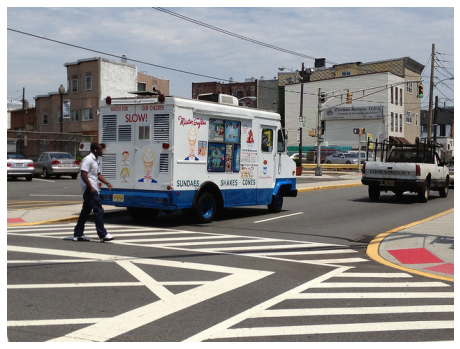

In [ ]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

## Instance Annotations

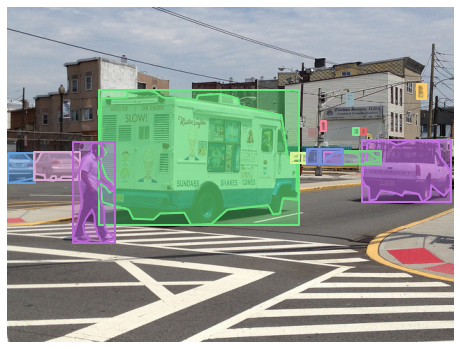

In [ ]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, True)

## Merge Category Name and Annotations

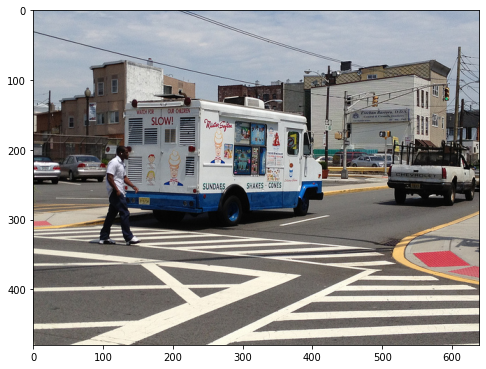

In [ ]:
import pandas as pd

anns_df = pd.DataFrame(anns)
cats_df = pd.DataFrame(cats)
anns_df['category_name'] = ''
for ann in anns_df.itertuples():
  anns_df.loc[ann.Index, 'category_name'] = cats_df[cats_df['id'] == ann.category_id]['name'].iloc[0]

anns_df.iloc[0]




## Drawing Rectangles with OpenCV

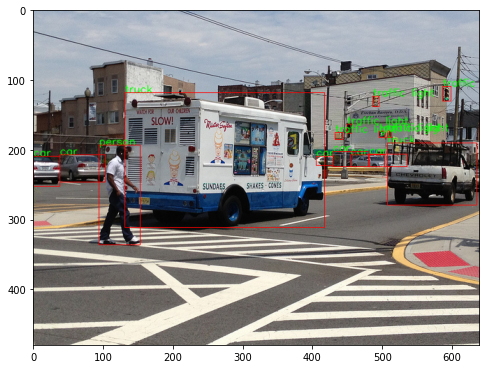

In [ ]:
import cv2

I = io.imread(img['coco_url'])




for ann in anns_df.itertuples():

  cx = int(anns_df.loc[anns_df.index == ann.Index,'bbox'].iloc[0][0])
  cy = int(anns_df.loc[anns_df.index == ann.Index,'bbox'].iloc[0][1])

  temp = [int(element) for element in anns_df.loc[anns_df.index == ann.Index,'bbox'].iloc[0]]
  temp[2] = temp[0] + temp[2]
  temp[3] = temp[1] + temp[3]
  ry = tuple(temp[0:2])
  rx = tuple(temp[2:])

  

  cv2.putText(I, text= anns_df['category_name'].iloc[ann.Index], org=(cx,cy),
              fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,255,0),
              thickness=1, lineType=cv2.LINE_AA)
  cv2.rectangle(I, rx, ry, color = (255,0,0), thickness = 1)

plt.imshow(I)
plt.show()

## Caption Annotations

In [ ]:
annFile_Cats = '/Transferências/coco-2017/raw/captions_{}.json'.format(dataType)
coco_caps=COCO(annFile_Cats)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


A man who is walking across the street.
A busy intersection with an ice cream truck driving by.
a man walks behind an ice cream truck 
A man is crossing a street near an icecream truck.
The man is walking behind the concession bus.


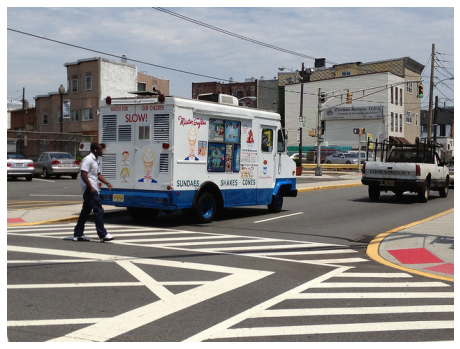

In [ ]:
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()